\# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 2 submission</b></u>

### Roster Name: Preet LNU
### Student ID: 014755741
### Email address: preet.lnu@sjsu.edu


##  <u>References and sources </u>

https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

Also took reference from knn.synthetic.data and from the examples


##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.spatial import distance
import statistics

In [2]:
np.random.seed(42)

#### Code the solution

KNN implementation 

In [3]:
def knn(newObservation, referenceData, k=3):
    distances = []
    for i in range(len(referenceData.index)):
        d = distance.euclidean(newObservation.iloc[0,:], referenceData.iloc[i,:-1])
        distances.append((d, i))
    
    sortedDistances = sorted(distances)
    kNearestDistances = sortedDistances[:3]

    kNearestLabels = [referenceData.iloc[i, -1] for d, i in kNearestDistances]

    return statistics.mode(kNearestLabels)

2D Data


In [4]:
n = 100

Class0Dim1 = np.random.normal(loc=-2.0, scale=2.0, size=int(n/2))
Class0Dim2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))

Class1Dim1 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2))
Class1Dim2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))

Dim1 = np.concatenate((Class0Dim1, Class1Dim1), axis=0)
Dim2 = np.concatenate((Class0Dim2, Class1Dim2), axis=0)

s1 = [0]*int(n/2)
s2 = [1]*int(n/2)
labels = s1+s2

dt = pd.DataFrame({'Dim1':Dim1, 'Dim2':Dim2}, columns=['Dim1', 'Dim2'])
dt.head(100)

,Dim1,Dim2
0,-1.006572,0.324084
1,-2.276529,-0.385082
2,-0.704623,-0.676922
3,1.046060,0.611676
4,-2.468307,1.031000
...,...,...
95,3.563646,0.385317
96,-0.473901,-0.883857
97,-0.640913,0.153725
98,3.043883,0.058209


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(dt,labels, test_size=0.2, random_state=0)

referenceData = pd.DataFrame({'Dim1':X_train.Dim1, 'Dim2':X_train.Dim2, 'Label':Y_train}, columns=['Dim1', 'Dim2', 'Label'])
referenceData.head(100)

,Dim1,Dim2,Label
43,-2.602207,-0.327662,0
62,2.120460,1.158596,1
3,1.046060,0.611676,0
71,0.181225,-0.815810,1
45,-3.439688,-1.463515,0
...,...,...,...
96,-0.473901,-0.883857,1
67,-0.337356,1.896793,1
64,1.615278,0.963376,1
47,0.114244,0.261055,0


In [6]:
newObservations = pd.DataFrame({'Dim1':X_test.Dim1, 'Dim2':X_test.Dim2}, columns=['Dim1', 'Dim2'])
newObservations.head(100)

,Dim1,Dim2
26,-4.301987,0.087047
86,0.433493,0.473238
2,-0.704623,-0.676922
55,2.808102,-0.714351
75,6.380911,0.827183
93,2.369268,-1.245739
16,-4.025662,-0.072010
73,-0.803702,0.341152
54,1.677429,0.293072
95,3.563646,0.385317


In [7]:
pred_results = []
for row in newObservations.itertuples():
    newObservation = pd.DataFrame({'Dim1':[row.Dim1], 'Dim2':[row.Dim2]}, columns=['Dim1', 'Dim2'])
    pred_results.append((knn(newObservation, referenceData)))
print(pred_results)

[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [8]:
num = 0
for i in range(len(pred_results)):
    if pred_results[i] == Y_test[i]:
        num += 1
precision = num / len(Y_test)
print('Precision: %f'% precision)

Precision: 0.900000


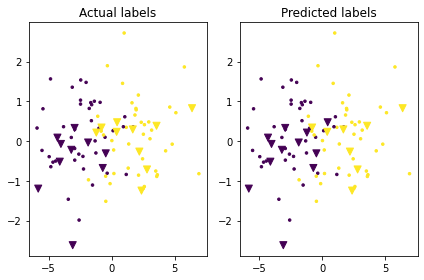

In [9]:
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=pred_results, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()

3D data


In [10]:
n = 1000

Class0Dim1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Class0Dim2 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))
Class0Dim3 = np.random.normal(loc=-1.0, scale=1.0, size=int(n/4))

Class1Dim1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Class1Dim2 = np.random.normal(loc=1.0, scale=2.0, size=int(n/4))
Class1Dim3 = np.random.normal(loc=1.0, scale=1.0, size=int(n/4))

Class2Dim1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Class2Dim2 = np.random.normal(loc=3.0, scale=1.0, size=int(n/4))
Class2Dim3 = np.random.normal(loc=4.0, scale=1.0, size=int(n/4))

Class3Dim1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Class3Dim2 = np.random.normal(loc=5.0, scale=3.0, size=int(n/4))
Class3Dim3 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))

Dim1 = np.concatenate((Class0Dim1, Class1Dim1, Class2Dim1, Class3Dim1), axis=0)
Dim2 = np.concatenate((Class0Dim2, Class1Dim2, Class2Dim2, Class3Dim2), axis=0)
Dim3 = np.concatenate((Class0Dim3, Class1Dim3, Class2Dim3, Class3Dim3), axis=0)

s1 = [0]*int(n/4)
s2 = [1]*int(n/4)
s3 = [2]*int(n/4)
s4 = [3]*int(n/4)
labels = s1+s2+s3+s4

dt = pd.DataFrame({'Dim1':Dim1, 'Dim2':Dim2, 'Dim3':Dim3}, columns=['Dim1', 'Dim2', 'Dim3'])
dt.head(1000)

,Dim1,Dim2,Dim3
0,1.073362,-3.062679,-1.522723
1,1.682354,-2.044858,0.049009
2,3.249154,-3.985726,-1.704344
3,3.161406,-2.495953,-2.408461
4,-4.133008,-3.530258,-2.556629
...,...,...,...
995,4.294100,1.556926,-4.880010
996,3.245300,5.255628,-2.287288
997,-3.936658,-3.973408,-4.883150
998,1.866210,4.439312,-3.372319


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(dt,labels, test_size=0.2, random_state=0)

referenceData = pd.DataFrame({'Dim1':X_train.Dim1, 'Dim2':X_train.Dim2, 'Dim3':X_train.Dim3, 'Label':Y_train}, columns=['Dim1', 'Dim2', 'Dim3', 'Label'])
referenceData.head(1000)

,Dim1,Dim2,Dim3,Label
687,1.272183,4.549020,3.075767,2
500,1.051890,1.226968,5.804348,2
332,1.197669,2.416217,1.323168,1
979,-0.790345,7.956349,-2.484372,3
817,-6.657901,6.364223,-5.832156,3
...,...,...,...,...
835,-0.885270,3.944236,-2.553127,3
192,-3.960700,-3.259591,0.066675,0
629,0.056549,2.549811,4.849102,2
559,3.944743,3.937570,4.198948,2


In [12]:
newObservations = pd.DataFrame({'Dim1':X_test.Dim1, 'Dim2':X_test.Dim2, 'Dim3':X_test.Dim3}, columns=['Dim1', 'Dim2', 'Dim3'])
newObservations.head(1000)

,Dim1,Dim2,Dim3
993,-0.403490,4.428491,-3.617642
859,2.772810,3.351379,-3.395681
298,-1.713537,1.467572,2.024063
553,-5.491899,2.692038,3.987911
672,-0.924103,2.980740,4.160018
...,...,...,...
679,-2.417610,3.718186,4.260281
722,-3.218229,2.680152,3.770609
215,-2.245460,-2.893570,-0.720978
653,2.757463,4.125435,2.634044


In [13]:
pred_results = []
for row in newObservations.itertuples():
    newObservation = pd.DataFrame({'Dim1':[row.Dim1], 'Dim2':[row.Dim2], 'Dim3':[row.Dim3]}, columns=['Dim1', 'Dim2', 'Dim3'])
    pred_results.append((knn(newObservation, referenceData)))
print(pred_results)

[3, 3, 1, 2, 2, 3, 0, 0, 2, 2, 1, 1, 3, 0, 2, 1, 3, 0, 0, 0, 0, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3, 2, 2, 3, 0, 2, 3, 1, 3, 1, 0, 3, 2, 2, 1, 3, 3, 0, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 3, 2, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 3, 1, 1, 3, 2, 2, 1, 0, 1, 3, 3, 2, 0, 2, 1, 3, 1, 1, 3, 1, 2, 2, 2, 0, 1, 1, 3, 1, 0, 3, 1, 2, 2, 3, 3, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 3, 3, 0, 3, 0, 3, 1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 1, 0, 2, 3, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 3, 3, 0, 2, 3, 1, 1, 3, 3, 0, 3, 1, 3, 0, 2, 3, 0, 3, 0, 1, 1, 3, 3, 2, 1, 3, 1, 3, 3, 1, 0, 3, 2, 2, 0, 2, 0]


In [14]:
num = 0
for j in range(len(pred_results)):
    if pred_results[j] == Y_test[j]:
        num += 1
precision = num / len(Y_test)
print('precision: %f'% precision)

precision: 0.915000
